In [2]:
import pandas as pd

In [21]:
import io
import requests
import ssl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels as sm
import matplotlib
import pandas as pd
import io
import requests
import ssl
import seaborn as sns


from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
from pylab import *

Загрузите файл HR.csv в pandas dataframe

In [3]:
data=pd.read_csv(r'C:\Users\Анна\Desktop\netology\HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)

In [7]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
data.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [9]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [11]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

Рассчитайте и визуализировать корреляционную матрицу для количественных переменных

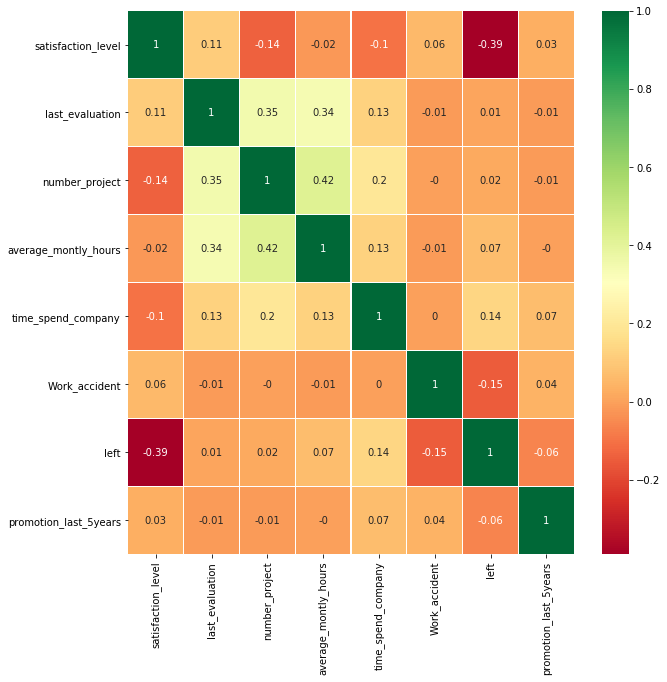

In [23]:
sns.heatmap(data.corr().round(2),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

сильных связей между переменными нет. самый сильный показатель -0,39 между увольнением и уровнем удовлетворенности

Рассчитайте сколько сотрудников работает в каждом департаменте.

In [29]:
#уберем уволенных
print(len(data[data['left']==0]['department']))
print(data[data['left']==0]['department'].value_counts())

11428
sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64


Больше всего сотрудников в департаментах:
sales          
technical    
support 

Показать распределение сотрудников по зарплатам.

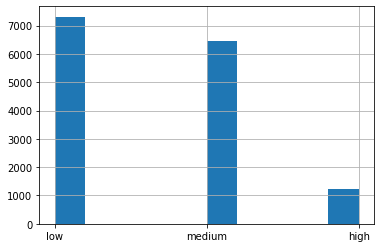

In [30]:
data['salary'].hist()

низкое кол-во сотрудников с высокой зп

Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности

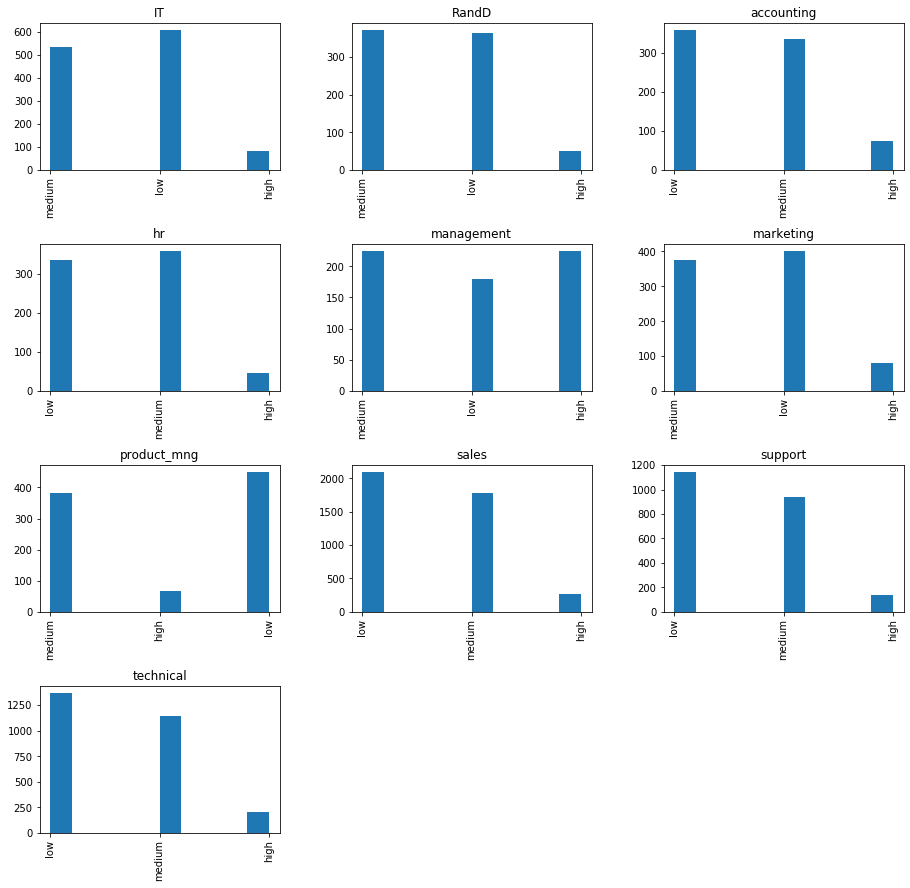

In [32]:
data.hist(column='salary', by='department',figsize=(15,15))
plt.show()

ситуация в разных департаментах похожа (кроме департамента менеджемента)

Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
    ●Доля сотрудников с повышением за последние 5 лет●Средняя степень удовлетворенности●Среднее количество проектов

In [37]:
data.groupby(data['promotion_last_5years'])[['left']].count()/((len(data)))


,left
promotion_last_5years,
0,0.978732
1,0.021268


Доля сотрудников с повышением за последние 5 лет среди уволившихся: 2%  , среди неуволившихся: 98%

In [30]:
data.groupby(data['left'])['satisfaction_level'].mean()

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

уровень удовлетворенности среди уволившихся 0,66. среди неуволившихся 0,44

In [32]:
data.groupby(data['left'])['number_project'].mean()

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

среднее кол-во проектов среди уволившихся и неуволившихся примерно одинаковое - 4 проекта